In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/pysentimiento_emocion.csv")
df.head()

,transcription,label,pysentimiento,daveni,monologg
0,"El precio de la luz baja, entre otras cosas, p...",neutral,neutral,neutral,neutral
1,"Del 25% en el conjunto de la nación, del 40% e...",disgust,neutral,neutral,neutral
2,"Pues si, tenían grandes altavoces, la música e...",neutral,neutral,neutral,joy
3,Tengo aquí en mis manos un auto de ejecución d...,disgust,neutral,neutral,neutral
4,que en el Partido Popular no solo no se tolera...,disgust,neutral,neutral,neutral


In [3]:
df.label.unique()

array(['neutral', 'disgust', 'anger', 'sadness', 'joy', 'fear'],
      dtype=object)

In [4]:
# ponemos en pysentimiento 1 si es igual a label y 0 de lo contrario

df['binary_pysentimiento'] = (df['label'] == df['pysentimiento']).astype(int)
df['binary_daveni'] = (df['label'] == df['daveni']).astype(int)
df['binary_monologg'] = (df['label'] == df['monologg']).astype(int)

In [5]:
df.head()

,transcription,label,pysentimiento,daveni,monologg,binary_pysentimiento,binary_daveni,binary_monologg
0,"El precio de la luz baja, entre otras cosas, p...",neutral,neutral,neutral,neutral,1,1,1
1,"Del 25% en el conjunto de la nación, del 40% e...",disgust,neutral,neutral,neutral,0,0,0
2,"Pues si, tenían grandes altavoces, la música e...",neutral,neutral,neutral,joy,1,1,0
3,Tengo aquí en mis manos un auto de ejecución d...,disgust,neutral,neutral,neutral,0,0,0
4,que en el Partido Popular no solo no se tolera...,disgust,neutral,neutral,neutral,0,0,0


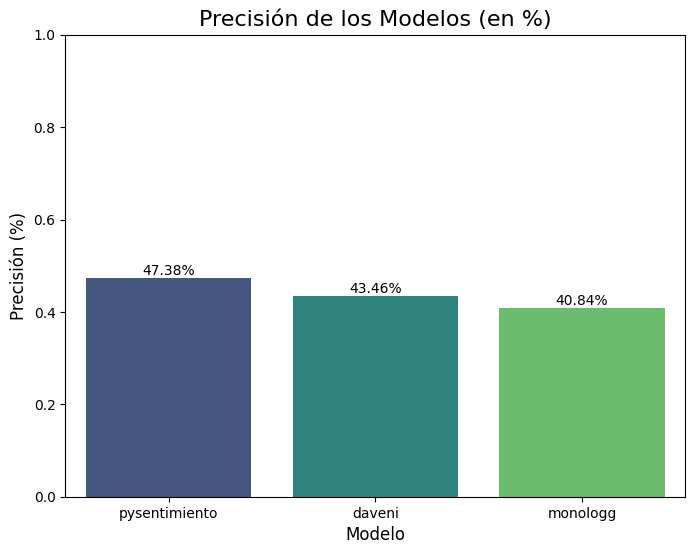

In [6]:
# Calcular la precisión de cada modelo
precision = {
    'pysentimiento': df['binary_pysentimiento'].mean(),
    'daveni': df['binary_daveni'].mean(),
    'monologg': df['binary_monologg'].mean()
}

# Convertir a DataFrame para graficar
precision_df = pd.DataFrame(list(precision.items()), columns=['Modelo', 'Precisión'])

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=precision_df, x='Modelo', y='Precisión',hue='Modelo', palette='viridis')

# Agregar las etiquetas en porcentaje arriba de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height*100:.2f}%",            # Convierte a porcentaje con 2 decimales
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Personalizar el gráfico
plt.title('Precisión de los Modelos (en %)', fontsize=16)
plt.ylabel('Precisión (%)', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.ylim(0, 1)  # La precisión abarca de 0 a 1
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transcription         382 non-null    object
 1   label                 382 non-null    object
 2   pysentimiento         382 non-null    object
 3   daveni                382 non-null    object
 4   monologg              382 non-null    object
 5   binary_pysentimiento  382 non-null    int64 
 6   binary_daveni         382 non-null    int64 
 7   binary_monologg       382 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 24.0+ KB


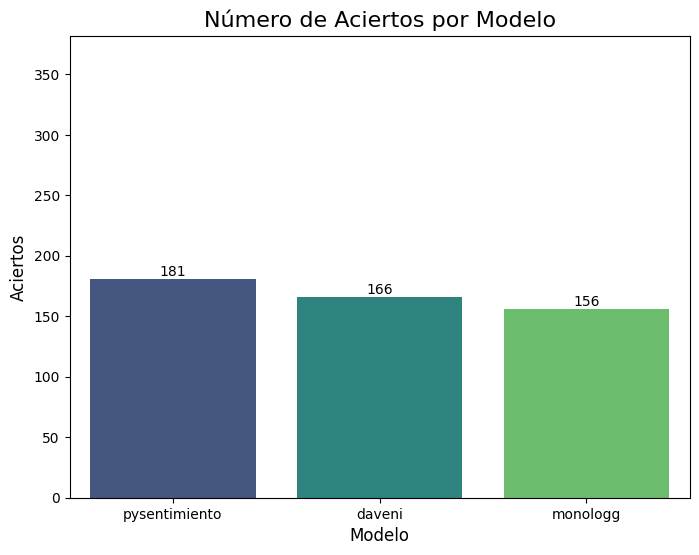

In [8]:
# Calcular la precisión de cada modelo
aciertos = {
    'pysentimiento': df['binary_pysentimiento'].sum(),
    'daveni': df['binary_daveni'].sum(),
    'monologg': df['binary_monologg'].sum()
}


# Convertir a DataFrame para graficar
aciertos_df = pd.DataFrame(list(aciertos.items()), columns=['Modelo', 'Aciertos'])

# Crear el gráfico de barras para los aciertos
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=aciertos_df, x='Modelo', y='Aciertos',hue='Modelo', palette='viridis')

# Agregar las etiquetas con el número exacto de aciertos encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",               # Mostrar el número exacto como entero
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Personalizar el gráfico
plt.title('Número de Aciertos por Modelo', fontsize=16)
plt.ylabel('Aciertos', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.ylim(0, df.shape[0])  # El número de aciertos no puede ser mayor que el número total de filas
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()

In [11]:
from sklearn.metrics import f1_score, recall_score

# Calcular F1-score y Recall para cada modelo
metricas = {
    'pysentimiento': {
        'F1-score': f1_score(df['label'], df['pysentimiento'], average='weighted'),
        'Recall': recall_score(df['label'], df['pysentimiento'], average='weighted')
    },
    'daveni': {
        'F1-score': f1_score(df['label'], df['daveni'], average='weighted'),
        'Recall': recall_score(df['label'], df['daveni'], average='weighted')
    },
    'monologg': {
        'F1-score': f1_score(df['label'], df['monologg'], average='weighted'),
        'Recall': recall_score(df['label'], df['monologg'], average='weighted')
    }
}

# Mostrar las métricas
for modelo, valores in metricas.items():
    print(f"Modelo: {modelo}")
    print(f"  F1-score: {valores['F1-score']:.2f}")
    print(f"  Recall: {valores['Recall']:.2f}")


Modelo: pysentimiento
  F1-score: 0.39
  Recall: 0.47
Modelo: daveni
  F1-score: 0.37
  Recall: 0.43
Modelo: monologg
  F1-score: 0.31
  Recall: 0.41


c:\Users\LENOVO\Desktop\modelo_emotion\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\Desktop\modelo_emotion\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
